In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#tsa stands for time series analysis

### Ice-cream production data

In [2]:
data = pd.read_csv("C:/Users/User/Desktop/Mayada Kh/Scripts - all/TIme series/ice_cream.csv")

In [3]:
data.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


Each row in the data corresponds to a month. The second column is related to the ice-cream production in the US. Higher values mean higher production.

In [4]:
#rename columns for better understanding
data.rename(columns = {'DATE': 'date', 'IPN31152N': 'production'}, inplace = True )

In [5]:
#convert date column to datetime data type
data.date = pd.to_datetime(data.date)
#set date to be index
data.set_index('date', inplace = True)

In [6]:
data.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [7]:
print(f'Most recent date in the data is {data.index.max()}')
print(f'Oldest date in the data is {data.index.min()}')

Most recent date in the data is 2020-01-01 00:00:00
Oldest date in the data is 1972-01-01 00:00:00


In [8]:
#subset data from 2010 onwards
data = data[pd.Timestamp('2011-01-01'):]

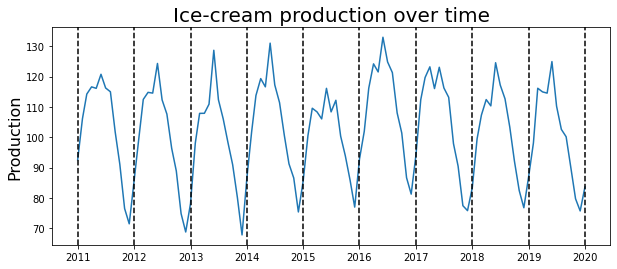

In [9]:

plt.figure(figsize = (10,4))
plt.plot(data.production)
plt.title('Ice-cream production over time', fontsize = 20)
plt.ylabel('Production', fontsize = 16)
#catch only for a 10 year period
for year in range(2011,2021): #adding dashed lines to separate the years
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle ='--')

### ACF

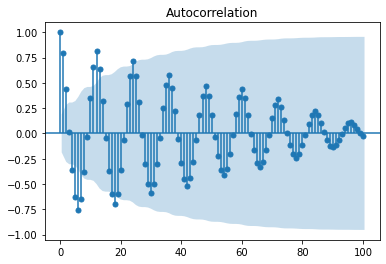

In [10]:
acf_plot = plot_acf(data.production, lags = 100)

By theory, for an autoregressive model, we would expect the ACF to exhibit a diminishing behaviour over time. From the plot above we can tell that we are dealing with an autoregressive process. 

### PACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


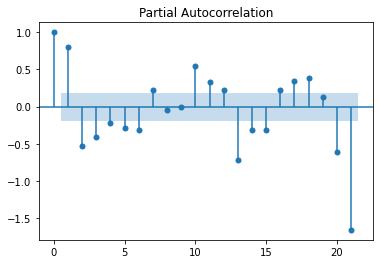

In [11]:
pacf_plot = plot_pacf(data.production)

Based on PACF we can start with an autoregressive model with lags 1,2,3,10 and 13

#### Note: ACF and PACF are tools to get us started with the analysis rather than get to final decisions about the model order and so on.

### On stock data

In [24]:
import yfinance as yf

In [25]:
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
tickerDF = tickerData.history(periods ='1d' , start = '2015-1-2', end= '2020-1-1')

* period -> Frequency at which to gather the data, ex: '1d'(daily), '1m'('monthly'), '1y'('yearly')
* start: start date. ex: '2010-1-1'
* end: end date. ex: '2020-1-1'

In [26]:
tickerDF.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,180.615531,181.053111,178.690169,179.784119,121465900,0.0,0
2015-01-05,178.681447,178.856477,176.213503,176.537308,169632600,0.0,0
2015-01-06,176.861116,177.412471,174.034352,174.874512,209151400,0.0,0
2015-01-07,176.274773,177.412484,175.802192,177.053665,125346700,0.0,0
2015-01-08,178.541413,180.423015,178.523919,180.195465,147217800,0.0,0


* Open: the stock price at the beginning of that day/month/year
* Close: the stock price at the end of that day/month/year
* High: the highest price the stock achieved that day/month/year
* Low:lowest price the stock achieved that day/month/year
* Volume: How many shares were tracked that day/month/year

In [14]:
tickerDF = tickerDF[['Close']]

In [15]:
tickerDF

,Close
Date,
2015-01-02,179.784134
2015-01-05,176.537308
2015-01-06,174.874481
2015-01-07,177.053604
2015-01-08,180.195465
...,...
2019-12-24,310.229187
2019-12-26,311.880554
2019-12-27,311.803345


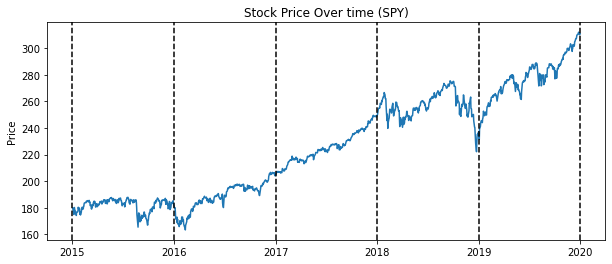

In [16]:
plt.figure(figsize=(10,4))
plt.plot(tickerDF.Close)
plt.title('Stock Price Over time (SPY)')
plt.ylabel('Price')
for i in range(2015,2021):
    plt.axvline(pd.to_datetime(str(i)+'-01-01'), color = 'k', linestyle = '--')

Stationarity: take first difference of this series (stock price on one day - stock price on previous day)

In [17]:
# first_diffs = tickerDF.Close - tickerDF.Close.shift()
first_diffs = tickerDF.Close[1:].values - tickerDF.Close[:-1].values
# first_diffs.drop('2014-12-31', axis = 0, inplace = True)

In [18]:
# first_diffs = np.concatenate([np.round(first_diffs.values, 2) , [0]])
first_diffs = np.concatenate([first_diffs , [0]])

In [19]:
tickerDF['FirstDifference'] = first_diffs

In [20]:
tickerDF.head()

,Close,FirstDifference
Date,,
2015-01-02,179.784134,-3.246826
2015-01-05,176.537308,-1.662827
2015-01-06,174.874481,2.179123
2015-01-07,177.053604,3.141861
2015-01-08,180.195465,-1.444046


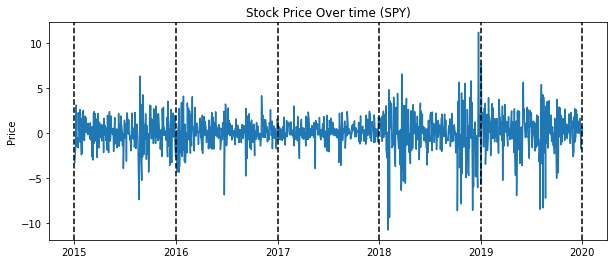

In [21]:
plt.figure(figsize=(10,4))
plt.plot(tickerDF.FirstDifference)
plt.title('Stock Price Over time (SPY)')
plt.ylabel('Price')
for i in range(2015,2021):
    plt.axvline(pd.to_datetime(str(i)+'-01-01'), color = 'k', linestyle = '--')

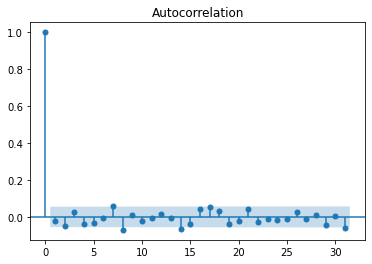

In [22]:
acf_plot = plot_acf(tickerDF.FirstDifference)

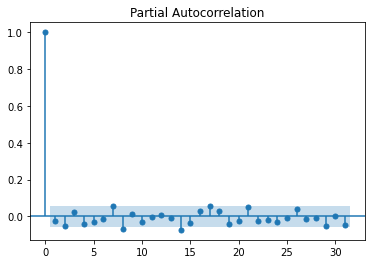

In [23]:
pacf_plot = plot_pacf(tickerDF.FirstDifference)